In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('EURUSD_M5_202201030005_202208081305.csv', sep = '\t')

In [3]:
gbp = pd.read_csv('GBPUSD_M5_202201030005_202208081305.csv', sep = '\t')

In [4]:
CHF = pd.read_csv('USDCHF_M5_202201030005_202208081310.csv', sep = '\t')

In [5]:
JPY = pd.read_csv('USDJPY_M5_202201030005_202208081310.csv', sep = '\t')

In [6]:
JPY['DT'] = JPY['<DATE>'] + JPY['<TIME>']
CHF['DT'] = CHF['<DATE>'] + CHF['<TIME>']
gbp['DT'] = gbp['<DATE>'] + gbp['<TIME>']
df['DT'] = df['<DATE>'] + df['<TIME>']

In [7]:
JPY = JPY.drop(['<DATE>','<TIME>','<VOL>', '<SPREAD>'], axis = 1)

In [8]:
gbp = gbp.drop(['<DATE>','<TIME>','<VOL>', '<SPREAD>'], axis = 1)

In [4]:
df = df.drop(['<DATE>','<TIME>','<VOL>', '<SPREAD>'], axis = 1)

In [10]:
CHF = CHF.drop(['<DATE>','<TIME>','<VOL>', '<SPREAD>'], axis = 1)

In [11]:
CHF = CHF.rename(columns = {'<OPEN>':'o_ch','<HIGH>':'h_ch','<LOW>':'l_ch','<CLOSE>':'c_ch','<TICKVOL>':'vol_ch' })

In [12]:
JPY = JPY.rename(columns = {'<OPEN>':'o_j','<HIGH>':'h_j','<LOW>':'l_j','<CLOSE>':'c_j','<TICKVOL>':'vol_j' })
gbp = gbp.rename(columns = {'<OPEN>':'o_g','<HIGH>':'h_g','<LOW>':'l_g','<CLOSE>':'c_g','<TICKVOL>':'vol_g' })
df = df.rename(columns = {'<OPEN>':'o_e','<HIGH>':'h_e','<LOW>':'l_e','<CLOSE>':'c_e','<TICKVOL>':'vol_e' })

In [13]:
df = df.merge(right = JPY, how = 'left', on = 'DT')

In [14]:
df = df.merge(right = gbp, how = 'left', on = 'DT')

In [15]:
df = df.merge(right = CHF, how = 'left', on = 'DT')

In [39]:
df.dropna(inplace = True)

In [5]:
df

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>
0,1.13693,1.13693,1.13645,1.13674,49
1,1.13674,1.13729,1.13669,1.13713,49
2,1.13708,1.13723,1.13699,1.13719,43
3,1.13689,1.13709,1.13688,1.13708,26
4,1.13707,1.13717,1.13692,1.13708,35
...,...,...,...,...,...
44736,1.01790,1.01823,1.01786,1.01798,393
44737,1.01800,1.01859,1.01788,1.01848,377
44738,1.01848,1.01892,1.01843,1.01876,437
44739,1.01877,1.01902,1.01861,1.01864,344


In [6]:
Y = df['<CLOSE>']

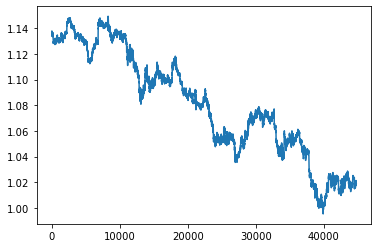

In [43]:
from matplotlib import pyplot as plt
plt.plot(range(len(Y)), Y)
#plt.plot(range(2880), Y[:2880])

In [28]:
df = df.drop(['DT'], axis = 1)

In [7]:
# Определим количество обучающих, тестовых и проверочных примеров
num_train_samples = int(0.75 * df.shape[0])
num_val_samples = int(0.15 * df.shape[0])
num_test_samples = df.shape[0] - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 33555
num_val_samples: 6711
num_test_samples: 4475


In [8]:
X = df.to_numpy()

In [46]:
X

array([[  1.13693,   1.13693,   1.13645,   1.13674,  49.     ],
       [  1.13674,   1.13729,   1.13669,   1.13713,  49.     ],
       [  1.13708,   1.13723,   1.13699,   1.13719,  43.     ],
       ...,
       [  1.01848,   1.01892,   1.01843,   1.01876, 437.     ],
       [  1.01877,   1.01902,   1.01861,   1.01864, 344.     ],
       [  1.01864,   1.01881,   1.01851,   1.01865, 262.     ]])

In [135]:
mean = X[:num_train_samples].mean(axis=0)
X -= mean
std = X[:num_train_samples].std(axis=0)
X /= std

In [9]:
#sampling_rate = 6
sequence_length = 24
delay = 24
batch_size = 256

In [10]:
X.shape

(44741, 5)

In [11]:
import numpy as np
from tensorflow import keras

2022-08-11 21:15:00.865299: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-11 21:15:00.865317: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [12]:
train_dataset = keras.utils.timeseries_dataset_from_array(
    X[:-delay],
    targets=Y[delay:],
    sequence_length=sequence_length,
    shuffle=False,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
    X[:-delay],
    targets=Y[delay:],
    sequence_length=sequence_length,
    shuffle=False,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)

test_dataset = keras.utils.timeseries_dataset_from_array(
    X[:-delay],
    targets=Y[delay:],
    sequence_length=sequence_length,
    shuffle=False,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples)

2022-08-11 21:15:05.493008: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-11 21:15:05.493030: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-11 21:15:05.493045: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sergey-home): /proc/driver/nvidia/version does not exist
2022-08-11 21:15:05.493249: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
for samples, targets in train_dataset:
    print("samples shape:", samples.shape)
    print("targets shape:", targets.shape)
    break

samples shape: (256, 24, 5)
targets shape: (256,)


In [14]:
samples[0]       

<tf.Tensor: shape=(24, 5), dtype=float64, numpy=
array([[  1.13693,   1.13693,   1.13645,   1.13674,  49.     ],
       [  1.13674,   1.13729,   1.13669,   1.13713,  49.     ],
       [  1.13708,   1.13723,   1.13699,   1.13719,  43.     ],
       [  1.13689,   1.13709,   1.13688,   1.13708,  26.     ],
       [  1.13707,   1.13717,   1.13692,   1.13708,  35.     ],
       [  1.13705,   1.13726,   1.13699,   1.13713,  74.     ],
       [  1.13723,   1.13734,   1.13711,   1.13726,  41.     ],
       [  1.13726,   1.13732,   1.13721,   1.13731,  31.     ],
       [  1.13731,   1.13739,   1.1372 ,   1.13724,  76.     ],
       [  1.13723,   1.13742,   1.13721,   1.13722,  95.     ],
       [  1.13721,   1.13727,   1.13718,   1.13726,  52.     ],
       [  1.13725,   1.13778,   1.13717,   1.13778, 306.     ],
       [  1.13775,   1.13775,   1.13724,   1.13757, 175.     ],
       [  1.13754,   1.13757,   1.13719,   1.13721, 131.     ],
       [  1.13726,   1.13758,   1.13707,   1.13713, 134

In [15]:
samples[1] 

<tf.Tensor: shape=(24, 5), dtype=float64, numpy=
array([[  1.13674,   1.13729,   1.13669,   1.13713,  49.     ],
       [  1.13708,   1.13723,   1.13699,   1.13719,  43.     ],
       [  1.13689,   1.13709,   1.13688,   1.13708,  26.     ],
       [  1.13707,   1.13717,   1.13692,   1.13708,  35.     ],
       [  1.13705,   1.13726,   1.13699,   1.13713,  74.     ],
       [  1.13723,   1.13734,   1.13711,   1.13726,  41.     ],
       [  1.13726,   1.13732,   1.13721,   1.13731,  31.     ],
       [  1.13731,   1.13739,   1.1372 ,   1.13724,  76.     ],
       [  1.13723,   1.13742,   1.13721,   1.13722,  95.     ],
       [  1.13721,   1.13727,   1.13718,   1.13726,  52.     ],
       [  1.13725,   1.13778,   1.13717,   1.13778, 306.     ],
       [  1.13775,   1.13775,   1.13724,   1.13757, 175.     ],
       [  1.13754,   1.13757,   1.13719,   1.13721, 131.     ],
       [  1.13726,   1.13758,   1.13707,   1.13713, 134.     ],
       [  1.13714,   1.13715,   1.1369 ,   1.13697,  66

In [20]:
from tensorflow.keras import layers
inputs = keras.Input(shape=(sequence_length, X.shape[-1]))

x = layers.LSTM(32, return_sequences = True)(inputs) #recurrent_dropout=0.25
x = layers.LSTM(32, )(x)

#x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)

model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("forex_lstm.h5",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=5,
                    validation_data=val_dataset,
                    callbacks=callbacks)

Epoch 1/5
131/131 [==============================] - 6s 30ms/step - loss: 0.0081 - mae: 0.0514 - val_loss: 0.0021 - val_mae: 0.0410
Epoch 2/5
131/131 [==============================] - 3s 26ms/step - loss: 0.0013 - mae: 0.0341 - val_loss: 0.0015 - val_mae: 0.0335
Epoch 3/5
131/131 [==============================] - 3s 25ms/step - loss: 8.3424e-04 - mae: 0.0261 - val_loss: 0.0011 - val_mae: 0.0267
Epoch 4/5
131/131 [==============================] - 3s 26ms/step - loss: 6.0959e-04 - mae: 0.0211 - val_loss: 8.8290e-04 - val_mae: 0.0222
Epoch 5/5
131/131 [==============================] - 4s 27ms/step - loss: 4.7416e-04 - mae: 0.0185 - val_loss: 7.6342e-04 - val_mae: 0.0199


In [66]:
history = model.fit(train_dataset,
                    epochs=50,
                    validation_data=val_dataset,
                    callbacks=callbacks)

Epoch 1/50
131/131 [==============================] - 3s 21ms/step - loss: 3.1831e-04 - mae: 0.0146 - val_loss: 6.0315e-04 - val_mae: 0.0173
Epoch 2/50
131/131 [==============================] - 3s 21ms/step - loss: 2.6998e-04 - mae: 0.0134 - val_loss: 5.9079e-04 - val_mae: 0.0172
Epoch 3/50
131/131 [==============================] - 3s 21ms/step - loss: 2.3206e-04 - mae: 0.0122 - val_loss: 5.7060e-04 - val_mae: 0.0170
Epoch 4/50
131/131 [==============================] - 3s 21ms/step - loss: 2.0988e-04 - mae: 0.0113 - val_loss: 5.5937e-04 - val_mae: 0.0169
Epoch 5/50
131/131 [==============================] - 3s 21ms/step - loss: 1.9746e-04 - mae: 0.0108 - val_loss: 5.4769e-04 - val_mae: 0.0168
Epoch 6/50
131/131 [==============================] - 3s 21ms/step - loss: 1.8882e-04 - mae: 0.0103 - val_loss: 5.3655e-04 - val_mae: 0.0167
Epoch 7/50
131/131 [==============================] - 3s 22ms/step - loss: 1.8261e-04 - mae: 0.0099 - val_loss: 5.2998e-04 - val_mae: 0.0166
Epoch 8/50
13

In [16]:
last_seq = X[-sequence_length:]
    

In [17]:
last_seq

array([[  1.02032,   1.02034,   1.01948,   1.01948, 328.     ],
       [  1.01948,   1.01957,   1.01894,   1.01902, 666.     ],
       [  1.01902,   1.01948,   1.01887,   1.01889, 420.     ],
       [  1.01889,   1.01929,   1.01872,   1.01904, 471.     ],
       [  1.01904,   1.0192 ,   1.01868,   1.01872, 350.     ],
       [  1.01872,   1.01874,   1.01832,   1.01858, 447.     ],
       [  1.01858,   1.01903,   1.01858,   1.01889, 508.     ],
       [  1.01889,   1.01928,   1.01864,   1.01871, 481.     ],
       [  1.0187 ,   1.01879,   1.01842,   1.0187 , 433.     ],
       [  1.01871,   1.01939,   1.01865,   1.01921, 439.     ],
       [  1.0192 ,   1.0192 ,   1.01816,   1.01817, 383.     ],
       [  1.01816,   1.01838,   1.01812,   1.01819, 364.     ],
       [  1.01819,   1.01825,   1.01782,   1.01803, 375.     ],
       [  1.01802,   1.01829,   1.01729,   1.01792, 544.     ],
       [  1.01792,   1.01794,   1.01751,   1.01758, 448.     ],
       [  1.01758,   1.01811,   1.01753,

In [18]:
last_seq = np.expand_dims(last_seq, axis=0)

In [21]:
model.predict(last_seq)

array([[1.0551816]], dtype=float32)

In [157]:
last_seq.shape

(1, 120, 20)

In [61]:
pred = model.predict(test_dataset)

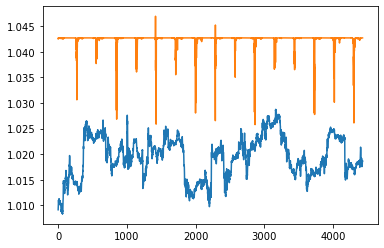

In [64]:
from matplotlib import pyplot as plt
plt.plot(range(4428), Y[-4428:])
plt.plot(range(4428), pred)

In [165]:
Y[num_train_samples + num_val_samples:].shape, pred.shape

((4473,), (4234, 1))

In [166]:
Y[-4234:]

40494    1.01603
40495    1.01624
40496    1.01640
40497    1.01679
40498    1.01716
          ...   
44736    1.01790
44737    1.01800
44738    1.01848
44739    1.01877
44740    1.01864
Name: o_e, Length: 4234, dtype: float64